In [2]:
#from google.colab import drive
#drive.mount('/gdrive')
#%cd /gdrive/My Drive/cvd

In [3]:
import numpy as np
import pandas as pd
import datetime as dt
import sklearn
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score as rs
from sklearn.metrics import precision_score as ps
from sklearn.metrics import f1_score as fs
from sklearn.metrics import log_loss

encoder = preprocessing.LabelEncoder()

###Data Preprocessing

In [5]:
data = pd.read_csv('data.csv')
data = data.drop('id',axis=1)
data = data.fillna(np.nan,axis=0)
data['location'] = encoder.fit_transform(data['location'].astype(str))
data['country'] = encoder.fit_transform(data['country'].astype(str))
data['gender'] = encoder.fit_transform(data['gender'].astype(str))
data[['symptom1']] = encoder.fit_transform(data['symptom1'].astype(str))
data[['symptom2']] = encoder.fit_transform(data['symptom2'].astype(str))
data[['symptom3']] = encoder.fit_transform(data['symptom3'].astype(str))
data[['symptom4']] = encoder.fit_transform(data['symptom4'].astype(str))
data[['symptom5']] = encoder.fit_transform(data['symptom5'].astype(str))
data[['symptom6']] = encoder.fit_transform(data['symptom6'].astype(str))

In [6]:
data['sym_on'] = pd.to_datetime(data['sym_on'])
data['hosp_vis'] = pd.to_datetime(data['hosp_vis'])
data['sym_on']= data['sym_on'].map(dt.datetime.toordinal)
data['hosp_vis']= data['hosp_vis'].map(dt.datetime.toordinal)
data['diff_sym_hos']= data['hosp_vis'] - data['sym_on']

In [7]:
data['diff_symp_hos'] = data['hosp_vis']-data['sym_on']

In [8]:
data = data.drop(['sym_on','hosp_vis'],axis=1)

In [9]:
print(data.dtypes)

location           int32
country            int32
gender             int32
age              float64
vis_wuhan          int64
from_wuhan       float64
death              int64
recov              int64
symptom1           int32
symptom2           int32
symptom3           int32
symptom4           int32
symptom5           int32
symptom6           int32
diff_sym_hos       int64
diff_symp_hos      int64
dtype: object


###Training

In [10]:
tdata = pd.read_csv('train.csv')
print(tdata.head())

   id      location country gender   age      sym_on    hosp_vis  vis_wuhan  \
0  49  Wuhan, Hubei   China   male  61.0  12/20/2019  12/27/2019          0   
1  50  Wuhan, Hubei   China   male  69.0  12/30/2019    1/3/2020          0   
2  51  Wuhan, Hubei   China   male  89.0         NaN         NaN          0   
3  52  Wuhan, Hubei   China   male  89.0   1/13/2020   1/13/2020          0   
4  53  Wuhan, Hubei   China   male  66.0   1/10/2020   1/16/2020          0   

   from_wuhan  death symptom1 symptom2 symptom3  symptom4  symptom5  symptom6  
0           1      1      NaN      NaN      NaN       NaN       NaN       NaN  
1           1      1      NaN      NaN      NaN       NaN       NaN       NaN  
2           1      1      NaN      NaN      NaN       NaN       NaN       NaN  
3           1      1      NaN      NaN      NaN       NaN       NaN       NaN  
4           1      1      NaN      NaN      NaN       NaN       NaN       NaN  


In [11]:
tdata = pd.read_csv('train.csv')
tdata = tdata.drop('id',axis=1)
tdata = tdata.fillna(np.nan,axis=0)
tdata['age'] = tdata['age'].fillna(value=tdata['age'].mean())
tdata['location'] = encoder.fit_transform(tdata['location'].astype(str))
tdata['country'] = encoder.fit_transform(tdata['country'].astype(str))
tdata['gender'] = encoder.fit_transform(tdata['gender'].astype(str))
tdata[['symptom1']] = encoder.fit_transform(tdata['symptom1'].astype(str))
tdata[['symptom2']] = encoder.fit_transform(tdata['symptom2'].astype(str))
tdata[['symptom3']] = encoder.fit_transform(tdata['symptom3'].astype(str))
tdata[['symptom4']] = encoder.fit_transform(tdata['symptom4'].astype(str))
tdata[['symptom5']] = encoder.fit_transform(tdata['symptom5'].astype(str))
tdata[['symptom6']] = encoder.fit_transform(tdata['symptom6'].astype(str))

In [12]:
tdata['sym_on'] = pd.to_datetime(tdata['sym_on'])
tdata['hosp_vis'] = pd.to_datetime(tdata['hosp_vis'])
tdata['sym_on']= tdata['sym_on'].map(dt.datetime.toordinal)
tdata['hosp_vis']= tdata['hosp_vis'].map(dt.datetime.toordinal)
tdata['diff_sym_hos']= tdata['hosp_vis'] - tdata['sym_on']

In [13]:
tdata = tdata.drop(['sym_on','hosp_vis'],axis=1)
print(tdata)


     location  country  gender        age  vis_wuhan  from_wuhan  death  \
0          38        2       1  61.000000          0           1      1   
1          38        2       1  69.000000          0           1      1   
2          38        2       1  89.000000          0           1      1   
3          38        2       1  89.000000          0           1      1   
4          38        2       1  66.000000          0           1      1   
..        ...      ...     ...        ...        ...         ...    ...   
217         2        3       2  49.747537          0           0      0   
218        22        6       2  49.747537          0           0      1   
219        22        6       2  49.747537          0           0      1   
220        22        6       2  49.747537          0           0      1   
221        22        6       2  49.747537          0           0      1   

     symptom1  symptom2  symptom3  symptom4  symptom5  symptom6  diff_sym_hos  
0           9      

In [14]:
print(tdata.isna().sum())

location        0
country         0
gender          0
age             0
vis_wuhan       0
from_wuhan      0
death           0
symptom1        0
symptom2        0
symptom3        0
symptom4        0
symptom5        0
symptom6        0
diff_sym_hos    0
dtype: int64


In [15]:
from sklearn.metrics import recall_score as rs
from sklearn.metrics import precision_score as ps
from sklearn.metrics import f1_score as fs
from sklearn.metrics import balanced_accuracy_score as bas
from sklearn.metrics import confusion_matrix as cm

###Logisitic Regression

In [16]:
from sklearn.linear_model import LogisticRegression as lr

classifier = lr()

In [17]:
X = tdata[['location','country','gender','age','vis_wuhan','from_wuhan','symptom1','symptom2','symptom3','symptom4','symptom5','symptom6','diff_sym_hos']]
Y = tdata['death']

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)
classifier.fit(X_train,np.array(Y_train).reshape(Y_train.shape[0],1))


C:\Users\acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#####Evaluation of model

In [19]:
pred = np.array(classifier.predict(X_test))

recall_lr = rs(Y_test,pred)
precision_lr = ps(Y_test,pred)
f1_lr = fs(Y_test,pred)
ma_lr = classifier.score(X_test,Y_test)

In [20]:
print('*** Evaluation metrics for test dataset ***\n')
print('Recall Score: ',recall_lr)
print('Precision Score: ',precision_lr)
print('F1 Score: ',f1_lr)
print('Accuracy: ',ma_lr)
a = pd.DataFrame(Y_test)
a['pred']= classifier.predict(X_test)
print('\n\tTable 3\n')
print(a.head())

*** Evaluation metrics for test dataset ***

Recall Score:  0.7272727272727273
Precision Score:  0.6666666666666666
F1 Score:  0.6956521739130435
Accuracy:  0.8444444444444444

	Table 3

     death  pred
184      0     0
170      1     0
142      0     0
182      0     0
49       1     1


Text(0.5, 1.0, 'Evaluation Metrics for Logistic Regression')

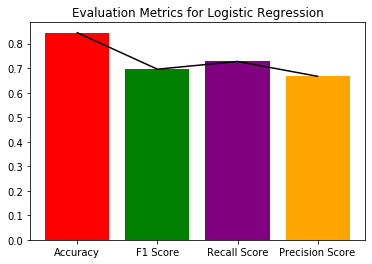

In [21]:
import matplotlib.pyplot as plt

plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma_lr,f1_lr,recall_lr,precision_lr],color=['red','green','purple','orange'])
plt.plot([ma_lr,f1_lr,recall_lr,precision_lr],color='black')
plt.title('Evaluation Metrics for Logistic Regression')

In [22]:
#print(pd.DataFrame({'Val':Y_test,'Pred':classifier.predict(X_test)}))

###Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier as dtc
classifier = dtc(max_depth=2)

In [24]:
X = tdata[['location','country','gender','age','vis_wuhan','from_wuhan','symptom1','symptom2','symptom3','symptom4','symptom5','symptom6','diff_sym_hos']]
Y = tdata['death']

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)
classifier.fit(X_train,np.array(Y_train).reshape(Y_train.shape[0],1))


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

######Evaluation of the model

In [26]:
pred = np.array(classifier.predict(X_test))

recall_dtc = rs(Y_test,pred)
precision_dtc = ps(Y_test,pred)
f1_dtc = fs(Y_test,pred)
ma_dtc = classifier.score(X_test,Y_test)

In [27]:
print('*** Evaluation metrics for test dataset ***\n')
print('Recall Score: ',recall_dtc)
print('Precision Score: ',precision_dtc)
print('F1 Score: ',f1_dtc)
print('Accuracy: ',ma_dtc)
a = pd.DataFrame(Y_test)
a['pred']= classifier.predict(X_test)
print('\n\tTable 3\n')
print(a.head())

*** Evaluation metrics for test dataset ***

Recall Score:  0.5454545454545454
Precision Score:  0.8571428571428571
F1 Score:  0.6666666666666665
Accuracy:  0.8666666666666667

	Table 3

     death  pred
184      0     0
170      1     0
142      0     0
182      0     0
49       1     0


Text(0.5, 1.0, 'Evaluation Metrics for Decision Tree')

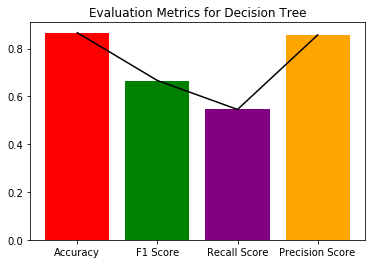

In [28]:
import matplotlib.pyplot as plt

plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma_dtc,f1_dtc,recall_dtc,precision_dtc],color=['red','green','purple','orange'])
plt.plot([ma_dtc,f1_dtc,recall_dtc,precision_dtc],color='black')
plt.title('Evaluation Metrics for Decision Tree')

######Visualizing the decision trees from random forest

C:\Users\acer\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


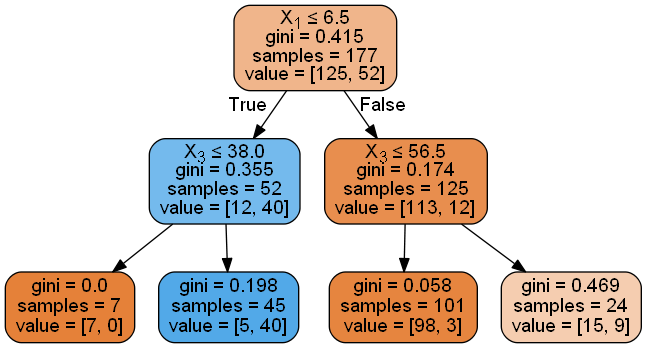

In [29]:
classifier.fit(X_train,np.array(Y_train).reshape(Y_train.shape[0],1))
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

estimator = classifier
dot_data = StringIO()
export_graphviz(estimator, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(),width=250,height=200)


###SVM

In [30]:
from sklearn import svm
classifier = svm.SVC()

In [31]:
X = tdata[['location','country','gender','age','vis_wuhan','from_wuhan','symptom1','symptom2','symptom3','symptom4','symptom5','symptom6','diff_sym_hos']]
Y = tdata['death']

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)
classifier.fit(X_train,np.array(Y_train).reshape(Y_train.shape[0],1))


C:\Users\acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

######Evaluation of the model

In [33]:
pred = np.array(classifier.predict(X_test))

recall_svm = rs(Y_test,pred)
precision_svm = ps(Y_test,pred)
f1_svm = fs(Y_test,pred)
ma_svm = classifier.score(X_test,Y_test)

In [34]:
print('*** Evaluation metrics for test dataset ***\n')
print('Recall Score: ',recall_svm)
print('Precision Score: ',precision_svm)
print('F1 Score: ',f1_svm)
print('Accuracy: ',ma_svm)
a = pd.DataFrame(Y_test)
a['pred']= classifier.predict(X_test)
print('\n\tTable 3\n')
print(a.head())

*** Evaluation metrics for test dataset ***

Recall Score:  0.6363636363636364
Precision Score:  0.7
F1 Score:  0.6666666666666666
Accuracy:  0.8444444444444444

	Table 3

     death  pred
184      0     0
170      1     0
142      0     0
182      0     0
49       1     1


Text(0.5, 1.0, 'Evaluation Metrics for Support Vector Machine')

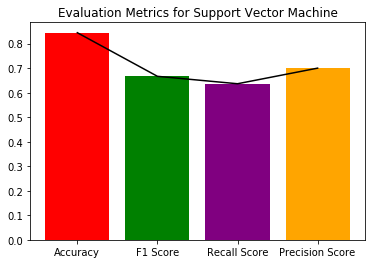

In [35]:
import matplotlib.pyplot as plt

plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma_svm,f1_svm,recall_svm,precision_svm],color=['red','green','purple','orange'])
plt.plot([ma_svm,f1_svm,recall_svm,precision_svm],color='black')
plt.title('Evaluation Metrics for Support Vector Machine')

###Gaussian Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

In [37]:
X = tdata[['location','country','gender','age','vis_wuhan','from_wuhan','symptom1','symptom2','symptom3','symptom4','symptom5','symptom6','diff_sym_hos']]
Y = tdata['death']

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)
classifier.fit(X_train,np.array(Y_train).reshape(Y_train.shape[0],1))


C:\Users\acer\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

######Evaluation of the model

In [39]:
pred = np.array(classifier.predict(X_test))

recall_gnb = rs(Y_test,pred)
precision_gnb = ps(Y_test,pred)
f1_gnb = fs(Y_test,pred)
ma_gnb = classifier.score(X_test,Y_test)

In [40]:
print('*** Evaluation metrics for test dataset ***\n')
print('Recall Score: ',recall_gnb)
print('Precision Score: ',precision_gnb)
print('F1 Score: ',f1_gnb)
print('Accuracy: ',ma_gnb)
a = pd.DataFrame(Y_test)
a['pred']= classifier.predict(X_test)
print('\n\tTable 3\n')
print(a.head())

*** Evaluation metrics for test dataset ***

Recall Score:  0.7272727272727273
Precision Score:  0.5333333333333333
F1 Score:  0.6153846153846153
Accuracy:  0.7777777777777778

	Table 3

     death  pred
184      0     0
170      1     0
142      0     0
182      0     0
49       1     1


Text(0.5, 1.0, 'Evaluation Metrics for Gaussian Naive Bayes')

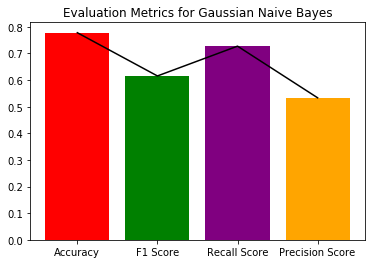

In [41]:
import matplotlib.pyplot as plt

plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma_gnb,f1_gnb,recall_gnb,precision_gnb],color=['red','green','purple','orange'])
plt.plot([ma_gnb,f1_gnb,recall_gnb,precision_gnb],color='black')
plt.title('Evaluation Metrics for Gaussian Naive Bayes')

###Boosted Random Forest

In [42]:
from sklearn.metrics import recall_score as rs
from sklearn.metrics import precision_score as ps
from sklearn.metrics import f1_score as fs
from sklearn.metrics import balanced_accuracy_score as bas
from sklearn.metrics import confusion_matrix as cm

In [43]:
rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
classifier = AdaBoostClassifier(rf,50,0.01,'SAMME.R',10)

In [44]:
X = tdata[['location','country','gender','age','vis_wuhan','from_wuhan','symptom1','symptom2','symptom3','symptom4','symptom5','symptom6','diff_sym_hos']]
Y = tdata['death']

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
classifier.fit(X_train,np.array(Y_train).reshape(Y_train.shape[0],1))


C:\Users\acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=2,
                                                         min_samples_split=2,
                                          

######Evaluation of the model

In [46]:
pred = np.array(classifier.predict(X_test))

recall = rs(Y_test,pred)
precision = ps(Y_test,pred)
f1 = fs(Y_test,pred)
ma = classifier.score(X_test,Y_test)

In [47]:
print('*** Evaluation metrics for test dataset ***\n')
print('Recall Score: ',recall)
print('Precision Score: ',precision)
print('F1 Score: ',f1)
print('Accuracy: ',ma)
a = pd.DataFrame(Y_test)
a['pred']= classifier.predict(X_test)
print('\n\tTable 3\n')
print(a.head())

*** Evaluation metrics for test dataset ***

Recall Score:  0.75
Precision Score:  1.0
F1 Score:  0.8571428571428571
Accuracy:  0.9333333333333333

	Table 3

     death  pred
130      0     0
203      0     0
170      1     0
66       0     0
181      0     0


###Comparison of Evaluation Metrics

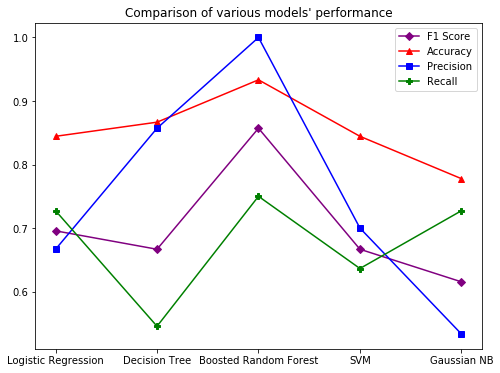

In [48]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
#plt.bar(['Logistic Regression','Decision Tree','SVM','Gaussian NB','Boosted Random Forest'],[f1_lr,f1_dtc,f1_svm,f1_gnb,f1],color=['red','green','purple','orange','Blue'])
plt.plot(['Logistic Regression','Decision Tree','Boosted Random Forest','SVM','Gaussian NB'],[f1_lr,f1_dtc,f1,f1_svm,f1_gnb],color='purple',marker='D')
plt.plot(['Logistic Regression','Decision Tree','Boosted Random Forest','SVM','Gaussian NB'],[ma_lr,ma_dtc,ma,ma_svm,ma_gnb],color='red',marker='^')
plt.plot(['Logistic Regression','Decision Tree','Boosted Random Forest','SVM','Gaussian NB'],[precision_lr,precision_dtc,precision,precision_svm,precision_gnb],color='blue',marker='s')
plt.plot(['Logistic Regression','Decision Tree','Boosted Random Forest','SVM','Gaussian NB'],[recall_lr,recall_dtc,recall,recall_svm,recall_gnb],color='green',marker='P')
plt.legend(('F1 Score','Accuracy','Precision','Recall'))
plt.title('Comparison of various models\' performance')

plt.show(fig)